In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
data_dir = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
data_df = pd.read_excel(data_dir)
data_df.drop(data_df.filter(regex="Unname"),axis=1, inplace=True)
data_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Data Labeling

In [11]:
df_cols = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
           'Overall Height', 'Orientation', 'Glazing Area','Glazing Area Distribution',
           'Heating Load', 'Cooling Load']
data_df.columns = df_cols
data_df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Train-Val-Test Split

In [12]:
inputs_cols = df_cols[:-2]
targets_cols = df_cols[-2:]

inputs_df = data_df[inputs_cols].copy()
targets_df = data_df[targets_cols].copy()
from sklearn.model_selection import train_test_split

# Train-Test Split

In [13]:
test_split_var = train_test_split(inputs_df,
                                  targets_df,
                                  test_size=0.20,
                                  random_state=42)

(raw_inputs, test_inputs, raw_targets, test_targets) = test_split_var

# Train-Val Split

In [14]:
val_split_var = train_test_split(raw_inputs,
                                 raw_targets,
                                 test_size=0.20,
                                 random_state=42)
    
(train_inputs, val_inputs, train_targets, val_targets) = val_split_var

# EDA

In [15]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 140 to 393
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       491 non-null    float64
 1   Surface Area               491 non-null    float64
 2   Wall Area                  491 non-null    float64
 3   Roof Area                  491 non-null    float64
 4   Overall Height             491 non-null    float64
 5   Orientation                491 non-null    int64  
 6   Glazing Area               491 non-null    float64
 7   Glazing Area Distribution  491 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 34.5 KB


In [16]:
train_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 140 to 393
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Heating Load  491 non-null    float64
 1   Cooling Load  491 non-null    float64
dtypes: float64(2)
memory usage: 11.5 KB


In [17]:
train_inputs

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
140,0.62,808.5,367.5,220.50,3.5,2,0.10,2
735,0.82,612.5,318.5,147.00,7.0,5,0.40,5
100,0.90,563.5,318.5,122.50,7.0,2,0.10,2
574,0.62,808.5,367.5,220.50,3.5,4,0.40,1
693,0.76,661.5,416.5,122.50,7.0,3,0.40,4
...,...,...,...,...,...,...,...,...
703,0.71,710.5,269.5,220.50,3.5,5,0.40,4
412,0.71,710.5,269.5,220.50,3.5,2,0.25,3
38,0.66,759.5,318.5,220.50,3.5,4,0.00,0
386,0.98,514.5,294.0,110.25,7.0,4,0.25,3


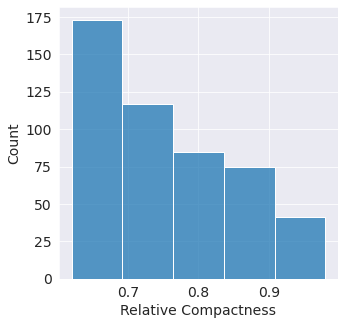

In [18]:
plt.figure(figsize=(5,5))
sns.histplot(train_inputs['Relative Compactness'], bins=5)

In [19]:
train_inputs.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.761222,674.273931,319.248473,177.512729,5.217923,3.496945,0.235947,2.790224
std,0.105989,88.505896,43.101782,45.062785,1.751490,1.125534,0.134567,1.554055
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000
25%,0.660000,612.500000,294.000000,147.000000,3.500000,2.500000,0.100000,1.500000
50%,0.740000,686.000000,318.500000,220.500000,3.500000,3.000000,0.250000,3.000000
75%,0.820000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000


In [20]:
train_targets.describe()

,Heating Load,Cooling Load
count,491.000000,491.000000
mean,22.109022,24.438635
std,9.957162,9.434852
min,6.010000,10.940000
25%,13.175000,15.835000
50%,17.410000,21.330000
75%,29.960000,32.940000
max,42.740000,47.590000


In [21]:
input_corr = train_inputs.corr()

input_corr

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
Relative Compactness,1.000000,-0.991847,-0.213956,-0.871699,0.830167,0.023811,-0.040003,0.002303
Surface Area,-0.991847,1.000000,0.205575,0.883714,-0.860965,-0.022696,0.037983,-0.000472
Wall Area,-0.213956,0.205575,1.000000,-0.276361,0.265743,-0.020051,-0.023183,-0.011834
Roof Area,-0.871699,0.883714,-0.276361,1.000000,-0.972582,-0.012699,0.048387,0.005196
Overall Height,0.830167,-0.860965,0.265743,-0.972582,1.000000,0.000856,-0.048891,-0.009038
Orientation,0.023811,-0.022696,-0.020051,-0.012699,0.000856,1.000000,0.032728,0.017718
Glazing Area,-0.040003,0.037983,-0.023183,0.048387,-0.048891,0.032728,1.000000,0.177636
Glazing Area Distribution,0.002303,-0.000472,-0.011834,0.005196,-0.009038,0.017718,0.177636,1.000000


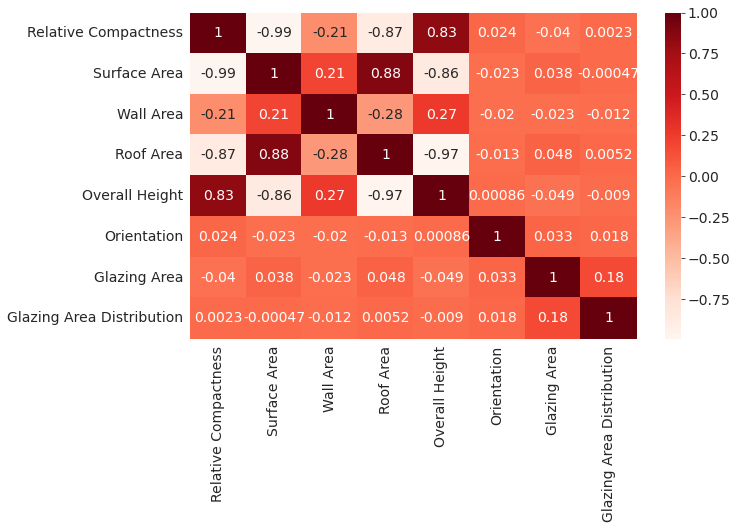

In [22]:
sns.heatmap(input_corr, cmap='Reds', annot=True)

In [23]:
target_corr = train_targets.corr()
target_corr

,Heating Load,Cooling Load
Heating Load,1.000000,0.975948
Cooling Load,0.975948,1.000000


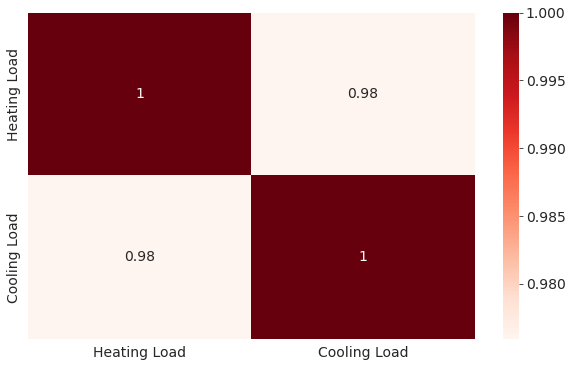

In [24]:
sns.heatmap(target_corr, cmap='Reds', annot=True)

In [25]:
train_targets.value_counts()

Heating Load  Cooling Load
15.55         21.33           3
15.09         18.36           2
11.33         15.00           2
24.77         29.79           2
15.36         19.29           2
                             ..
14.52         16.94           1
14.51         17.10           1
              16.50           1
14.50         17.12           1
42.74         38.84           1
Length: 484, dtype: int64

In [26]:
train_inputs.isna().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
dtype: int64

In [27]:
train_inputs.dtypes.value_counts()

float64    6
int64      2
dtype: int64

In [28]:
train_targets.dtypes.value_counts()

float64    2
dtype: int64

# Data Processing
# Scaling the Features

In [29]:
train_inputs.describe().loc[['min', 'max']]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
min,0.62,514.5,245.0,110.25,3.5,2.0,0.0,0.0
max,0.98,808.5,416.5,220.50,7.0,5.0,0.4,5.0


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_inputs[inputs_cols])

MinMaxScaler()

In [31]:
train_inputs[inputs_cols] = scaler.transform(train_inputs[inputs_cols])
val_inputs[inputs_cols] = scaler.transform(val_inputs[inputs_cols])
test_inputs[inputs_cols] = scaler.transform(test_inputs[inputs_cols])

In [32]:
train_inputs.describe().loc[['min', 'max']]

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# Model Training

In [33]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [34]:
model.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

# Model Evaluation

In [35]:
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             median_absolute_error,
                             explained_variance_score,
                             r2_score)
prediction_val = model.predict(val_inputs)
print(f'Mean Squared Error: {round(mean_squared_error(val_targets, prediction_val, squared=False), 3)}')
print(f'Mean Absolute Error: {round(mean_absolute_error(val_targets, prediction_val), 3)}')
print(f'Median Absolute Error: {round(median_absolute_error(val_targets, prediction_val), 3)}')
print(f'Explained Variance Score: {round(explained_variance_score(val_targets, prediction_val), 3)}')
print(f'R2 Score: {round(r2_score(val_targets, prediction_val, multioutput= "variance_weighted"), 3)}')

Mean Squared Error: 1.359
Mean Absolute Error: 0.801
Median Absolute Error: 0.258
Explained Variance Score: 0.974
R2 Score: 0.975


# Visualizing the Prediction

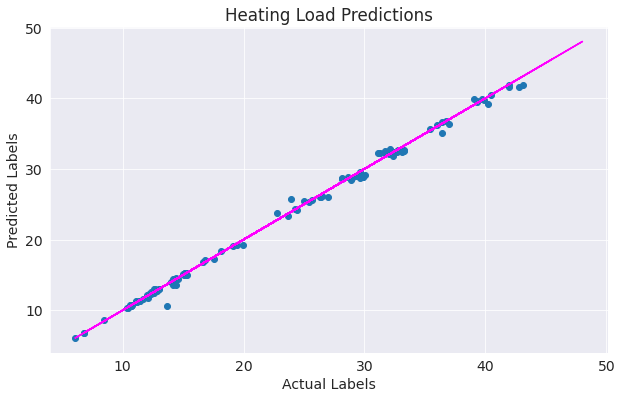

In [36]:
plt.scatter(val_targets['Heating Load'], pd.DataFrame(prediction_val)[0])
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Heating Load Predictions')

plt.plot(val_targets, val_targets, color='Magenta')

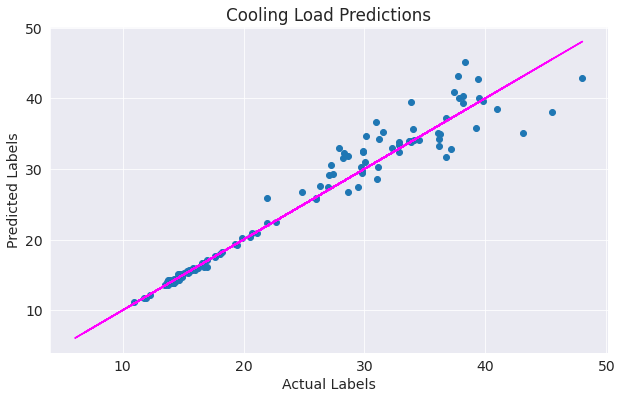

In [37]:
plt.scatter(val_targets['Cooling Load'], pd.DataFrame(prediction_val)[1])
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Cooling Load Predictions')

plt.plot(val_targets, val_targets, color='Magenta')

# Dummy Models

In [39]:
HL_mean = train_targets.mean()[0]
CL_mean = train_targets.mean()[1]
dummy_targets = val_targets.copy()
dummy_targets['Heating Load']=HL_mean
dummy_targets['Cooling Load']=CL_mean
print(f'Mean Squared Error: {round(mean_squared_error(val_targets, dummy_targets, squared=False), 3)}')
print(f'Mean Absolute Error: {round(mean_absolute_error(val_targets, dummy_targets), 3)}')
print(f'Median Absolute Error: {round(median_absolute_error(val_targets, dummy_targets), 3)}')
print(f'Explained Variance Score: {round(explained_variance_score(val_targets, dummy_targets), 3)}')
print(f'R2 Score: {round(r2_score(val_targets, dummy_targets, multioutput= "variance_weighted"), 3)}')

Mean Squared Error: 10.037
Mean Absolute Error: 9.172
Median Absolute Error: 9.355
Explained Variance Score: 0.0
R2 Score: -0.0


The Dummy Model predicts the outcome with Mean error loss of around 10

# Visualizing the Predictions

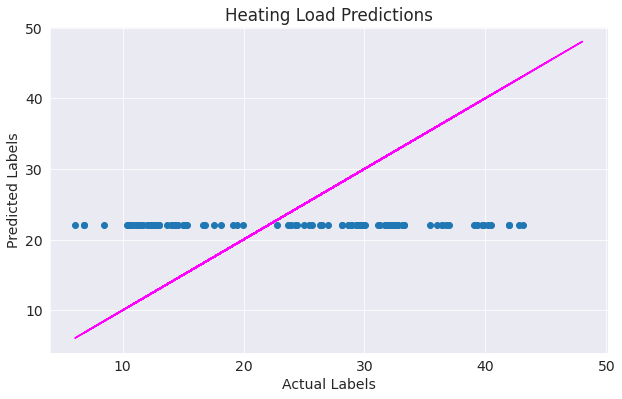

In [40]:
plt.scatter(val_targets['Heating Load'], dummy_targets['Heating Load'])
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Heating Load Predictions')

plt.plot(val_targets, val_targets, color='Magenta')

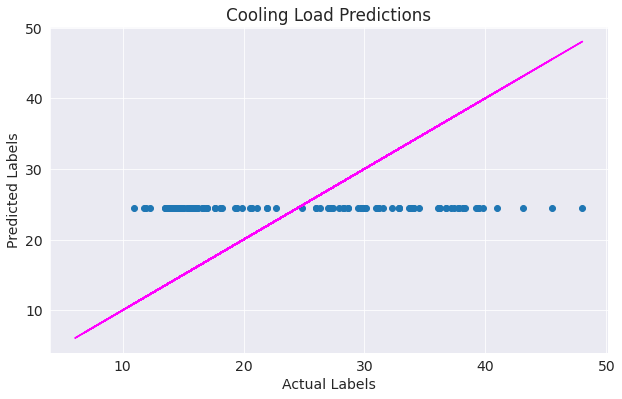

In [41]:
plt.scatter(val_targets['Cooling Load'], dummy_targets['Cooling Load'])
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Cooling Load Predictions')

plt.plot(val_targets, val_targets, color='Magenta')

# K-Fold Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
scores = cross_val_score(rf_model, train_inputs, train_targets, scoring='neg_mean_squared_error', cv=5)

In [43]:
scores

array([-1.72108973, -1.8144208 , -1.87635613, -2.30623684, -1.49850786])

In [44]:
scores = abs(scores)
print(f'Mean: {np.mean(scores)}, standard: {np.std(scores)}')

Mean: 1.8433222720127802, standard: 0.26459561388732045


In [45]:
from sklearn.model_selection import KFold

X = (train_inputs)
y = np.array(train_targets)

model_eval = []

kf = KFold(n_splits=5)
kf.get_n_splits(X, y)

for train_index,test_index in kf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf_model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    model_loss = mean_squared_error(val_targets, prediction_val, squared=False)
    model_eval.append(model_loss)

TRAIN: [ 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170
 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206
 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242
 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260
 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278
 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296
 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314
 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343

In [46]:
model_eval

[1.3594109378005237,
 1.3594109378005237,
 1.3594109378005237,
 1.3594109378005237,
 1.3594109378005237]

# Tune Hyperparameters

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {  'bootstrap': [True],
              'max_depth': [10, 15, 20],
              'max_features': [4, 5, 6],
              'n_estimators': [200, 250, 300],
              'min_samples_split': [2,3,4]
#               'min_samples_leaf': [1,2,3]
             }

rfr = RandomForestRegressor(random_state=1)

g_search = GridSearchCV(estimator = rfr,
                        param_grid = param_grid,
                        cv=3,
                        n_jobs=1,
                        verbose=0,
                        return_train_score=True,
                        scoring='neg_mean_squared_error')

g_search.fit(X_train, y_train)
print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 4, 'min_samples_split': 3, 'n_estimators': 200}


# Evaluating Best Parameters

In [48]:
rfr_best = RandomForestRegressor(random_state=1,
                                 max_depth=10,
                                 max_features=4,
#                                  min_samples_leaf=1,
                                 min_samples_split=3,
                                 n_estimators=200)
rfr_best.fit(train_inputs, train_targets)
RandomForestRegressor(max_depth=10, max_features=4, min_samples_split=3,
                      n_estimators=200, random_state=1)
rfr_predictions = rfr_best.predict(val_inputs)
print(f'Mean Squared Error: {round(mean_squared_error(val_targets, rfr_predictions, squared=False), 3)}')
print(f'Mean Absolute Error: {round(mean_absolute_error(val_targets, rfr_predictions), 3)}')
print(f'Median Absolute Error: {round(median_absolute_error(val_targets, rfr_predictions), 3)}')
print(f'Explained Variance Score: {round(explained_variance_score(val_targets, rfr_predictions), 3)}')
print(f'R2 Score: {round(r2_score(val_targets, rfr_predictions, multioutput= "variance_weighted"), 3)}')

Mean Squared Error: 1.317
Mean Absolute Error: 0.799
Median Absolute Error: 0.318
Explained Variance Score: 0.976
R2 Score: 0.978


# Visualizing the Predictions

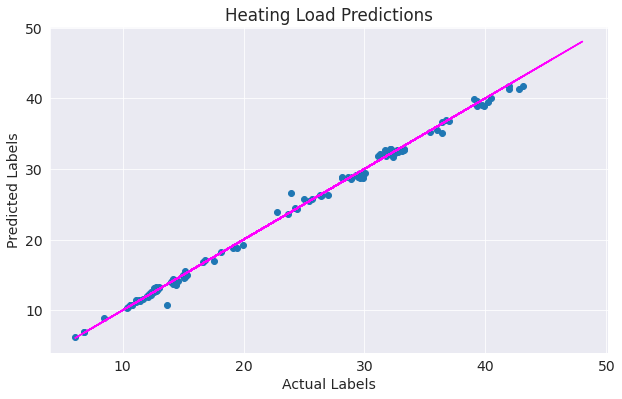

In [49]:
plt.scatter(val_targets['Heating Load'], pd.DataFrame(rfr_predictions)[0])
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Heating Load Predictions')

plt.plot(val_targets, val_targets, color='Magenta')

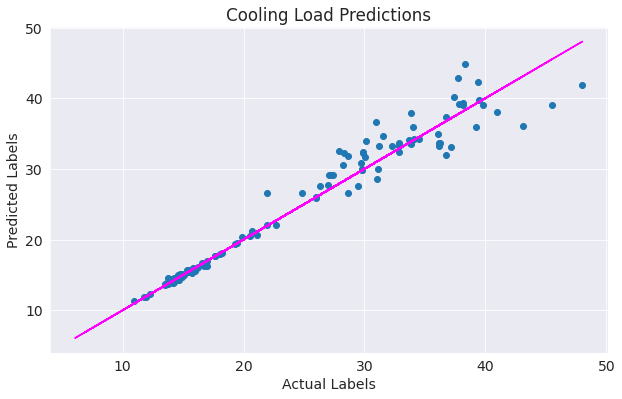

In [50]:
plt.scatter(val_targets['Cooling Load'], pd.DataFrame(rfr_predictions)[1])
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Cooling Load Predictions')

plt.plot(val_targets, val_targets, color='Magenta')

# Final Performance

First we will merge the training and Validation dataset to provide more data for the model to learn

In [51]:
frames1 = [train_inputs, val_inputs]
frames2 = [train_targets,val_targets]

X_inputs = pd.concat(frames1)
X_targets = pd.concat(frames2)
rfr_best.fit(X_inputs, X_targets)

RandomForestRegressor(max_depth=10, max_features=4, min_samples_split=3,
                      n_estimators=200, random_state=1)

In [52]:
prediction_final = rfr_best.predict(test_inputs)
print(f'Mean Squared Error: {round(mean_squared_error(test_targets, prediction_final, squared=False), 3)}')
print(f'Mean Absolute Error: {round(mean_absolute_error(test_targets, prediction_final), 3)}')
print(f'Median Absolute Error: {round(median_absolute_error(test_targets, prediction_final), 3)}')
print(f'Explained Variance Score: {round(explained_variance_score(test_targets, prediction_final), 3)}')
print(f'R2 Score: {round(r2_score(test_targets, prediction_final, multioutput= "variance_weighted"), 3)}')

Mean Squared Error: 1.203
Mean Absolute Error: 0.779
Median Absolute Error: 0.308
Explained Variance Score: 0.98
R2 Score: 0.981


# Visualizing the Model Prediction

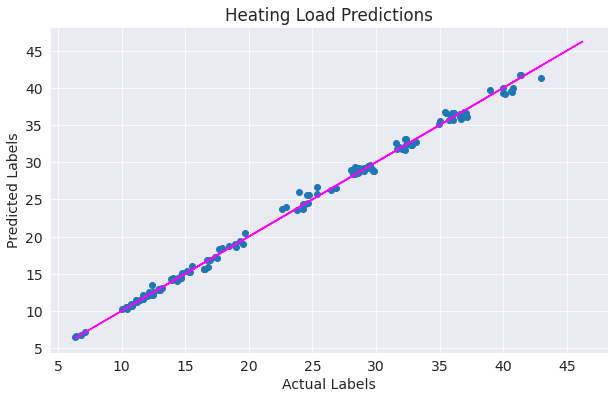

In [53]:
plt.scatter(test_targets['Heating Load'], pd.DataFrame(prediction_final)[0])
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Heating Load Predictions')

plt.plot(test_targets, test_targets, color='Magenta')